<a href="https://colab.research.google.com/github/elfeyaoo/39_sustanibility/blob/main/hackthon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/merged_file.csv')  # Make sure to replace 'your_dataset.csv' with the actual file path

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Air temperature', 'Pressure', 'Wind speed', 'Power generated by system']])

# Define sequence length (number of time steps to look back)
seq_length = 3  # You can adjust this value based on your preference

# Create sequences of data with the specified sequence length
sequences = []
for i in range(len(scaled_data) - seq_length):
    sequences.append(scaled_data[i:i+seq_length+1])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Split the data into features and target
X = sequences[:, :-1]  # Features (all columns except the last one)
y = sequences[:, -1][:, -1]  # Target (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
548/548 [==============================] - 8s 8ms/step - loss: 0.0187 - val_loss: 0.0112
Epoch 2/50
548/548 [==============================] - 3s 6ms/step - loss: 0.0115 - val_loss: 0.0115
Epoch 3/50
548/548 [==============================] - 4s 8ms/step - loss: 0.0112 - val_loss: 0.0109
Epoch 4/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0110 - val_loss: 0.0108
Epoch 5/50
548/548 [==============================] - 3s 6ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 6/50
548/548 [==============================] - 5s 9ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 7/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 8/50
548/548 [==============================] - 3s 6ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 9/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0107 - val_loss: 0.0108
Epoch 10/50
548/548 [==============================] - 4s 7ms/step - loss: 0.0107 - val_loss: 0.0107

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)

print("Mean Squared Error (MSE):", loss)

274/274 [==============================] - 1s 2ms/step - loss: 0.0101
Mean Squared Error (MSE): 0.010062997229397297


Epoch 1/50
548/548 [==============================] - 9s 9ms/step - loss: 0.0187 - val_loss: 0.0112
Epoch 2/50
548/548 [==============================] - 5s 9ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 3/50
548/548 [==============================] - 5s 9ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 4/50
548/548 [==============================] - 4s 8ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 5/50
548/548 [==============================] - 5s 10ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 6/50
548/548 [==============================] - 4s 8ms/step - loss: 0.0109 - val_loss: 0.0105
Epoch 7/50
548/548 [==============================] - 4s 8ms/step - loss: 0.0108 - val_loss: 0.0105
Epoch 8/50
548/548 [==============================] - 6s 10ms/step - loss: 0.0107 - val_loss: 0.0105
Epoch 9/50
548/548 [==============================] - 4s 8ms/step - loss: 0.0108 - val_loss: 0.0109
Epoch 10/50
548/548 [==============================] - 6s 10ms/step - loss: 0.0107 - val_loss: 0.0

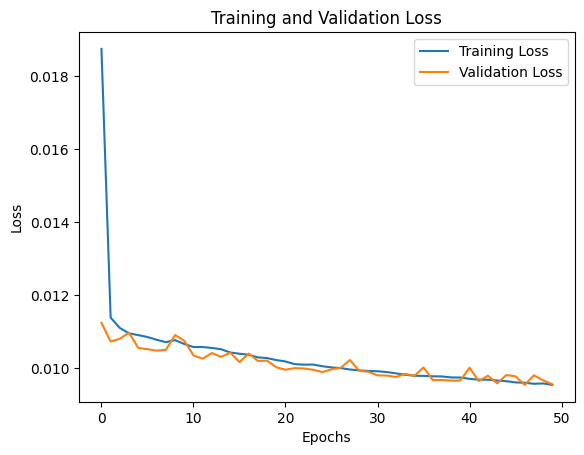

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/merged_file.csv')  # Replace 'your_dataset.csv' with the actual file path

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Air temperature', 'Pressure', 'Wind speed', 'Power generated by system']])

# Define sequence length (number of time steps to look back)
seq_length = 6

# Create sequences of data with the specified sequence length
sequences = []
for i in range(len(scaled_data) - seq_length):
    sequences.append(scaled_data[i:i+seq_length+1])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Split the data into features and target
X = sequences[:, :-1]  # Features (all columns except the last one)
y = sequences[:, -1][:, -1]  # Target (last column)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
val_loss = model.evaluate(X_val, y_val, verbose=0)

# Calculate training, testing, and validation accuracy
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss
val_accuracy = 1 - val_loss

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

# Calculate training and testing accuracy
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9905610624700785
Testing Accuracy: 0.9904029117897153


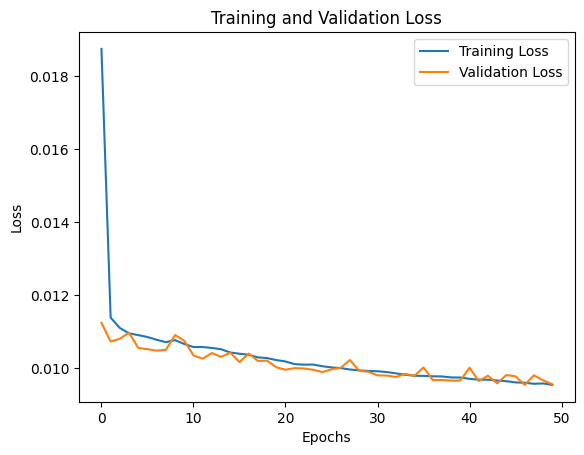

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# Extract original timestamps from the dataset
timestamps = data['DateTime']  # Replace 'DateTime' with the correct column name

# Predict total power generated using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Inverse transform the predictions to get the original scale
train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], train_predictions), axis=1))[:, -1]
test_predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], test_predictions), axis=1))[:, -1]
val_predictions_inv = scaler.inverse_transform(np.concatenate((X_val[:, -1, :-1], val_predictions), axis=1))[:, -1]

# Combine timestamps with predictions
train_data_with_predictions = np.concatenate((timestamps.iloc[seq_length:len(train_predictions_inv) + seq_length].values.reshape(-1, 1), train_predictions_inv.reshape(-1, 1)), axis=1)
test_data_with_predictions = np.concatenate((timestamps.iloc[len(train_predictions_inv) + seq_length:len(train_predictions_inv) + len(test_predictions_inv) + seq_length].values.reshape(-1, 1), test_predictions_inv.reshape(-1, 1)), axis=1)
val_data_with_predictions = np.concatenate((timestamps.iloc[len(train_predictions_inv) + len(test_predictions_inv) + seq_length:].values.reshape(-1, 1), val_predictions_inv.reshape(-1, 1)), axis=1)

# Create DataFrame for each dataset
train_df = pd.DataFrame(train_data_with_predictions, columns=['Timestamp', 'Predicted Power'])
test_df = pd.DataFrame(test_data_with_predictions, columns=['Timestamp', 'Predicted Power'])
val_df = pd.DataFrame(val_data_with_predictions, columns=['Timestamp', 'Predicted Power'])

# Write DataFrames to Excel with date and time stamps
with pd.ExcelWriter('predicted_power_with_timestamps.xlsx') as writer:
    train_df.to_excel(writer, sheet_name='Train', index=False)
    test_df.to_excel(writer, sheet_name='Test', index=False)
    val_df.to_excel(writer, sheet_name='Validation', index=False)
    # Print column names of the dataset
print(data.columns)



137/137 [==============================] - 0s 3ms/step
Index(['DateTime', 'Air temperature', 'Pressure', 'Wind speed',
       'Power generated by system'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the dataset containing the total power generated
data = pd.read_excel('/content/predicted_power_with_timestamps.xlsx')  # Assuming the file format is Excel

# Calculate the total power generated
total_power_generated = data['Predicted Power'].sum()  # Replace 'TotalPower' with the actual column name

# Calculate the power distribution to each node based on percentages
node1_power = total_power_generated * 0.20
node2_power = total_power_generated * 0.45
node3_power = total_power_generated * 0.35

# Create a DataFrame to store the power distribution
power_distribution = pd.DataFrame({
    'Node': ['Node 1', 'Node 2', 'Node 3'],
    'Power': [node1_power, node2_power, node3_power]
})

# Write the power distribution DataFrame to a CSV file
power_distribution.to_csv('power_distribution.csv', index=False)


In [ ]:
# Load the dataset containing the independent variables for the first 3 months of 2024
independent_variables = pd.read_csv('/content/independent_variables.csv')

# Preprocess the independent variables data
scaled_independent_variables = scaler.transform(independent_variables[['Air temperature', 'Pressure', 'Wind speed', 'Power generated by system']])

# Create sequences for prediction
prediction_sequences = []
for i in range(len(scaled_independent_variables) - seq_length):
    prediction_sequences.append(scaled_independent_variables[i:i+seq_length])

# Convert sequences to numpy array
prediction_sequences = np.array(prediction_sequences)

# Predict total power generated
predicted_power = model.predict(prediction_sequences)

# Print or use predicted_power for further analysis


1438/1438 [==============================] - 5s 3ms/step


Epoch 1/50
575/575 [==============================] - 8s 9ms/step - loss: 0.0194 - val_loss: 0.0115
Epoch 2/50
575/575 [==============================] - 5s 9ms/step - loss: 0.0113 - val_loss: 0.0111
Epoch 3/50
575/575 [==============================] - 4s 7ms/step - loss: 0.0111 - val_loss: 0.0108
Epoch 4/50
575/575 [==============================] - 4s 7ms/step - loss: 0.0110 - val_loss: 0.0107
Epoch 5/50
575/575 [==============================] - 5s 9ms/step - loss: 0.0109 - val_loss: 0.0106
Epoch 6/50
575/575 [==============================] - 4s 7ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 7/50
575/575 [==============================] - 5s 8ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 8/50
575/575 [==============================] - 5s 8ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 9/50
575/575 [==============================] - 4s 7ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 10/50
575/575 [==============================] - 5s 9ms/step - loss: 0.0106 - val_loss: 0.0108

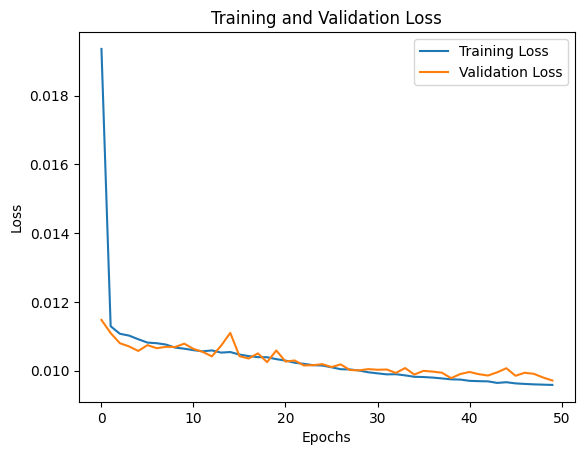

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/independent_variables.csv')  # Replace 'your_dataset.csv' with the actual file path

# Preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Air temperature', 'Pressure', 'Wind speed', 'Power generated by system']])

# Define sequence length (number of time steps to look back)
seq_length = 6

# Create sequences of data with the specified sequence length
sequences = []
for i in range(len(scaled_data) - seq_length):
    sequences.append(scaled_data[i:i+seq_length+1])

# Convert sequences to numpy array
sequences = np.array(sequences)

# Split the data into features and target
X = sequences[:, :-1]  # Features (all columns except the last one)
y = sequences[:, -1][:, -1]  # Target (last column)

# Split the data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
val_loss = model.evaluate(X_val, y_val, verbose=0)

# Calculate training, testing, and validation accuracy
train_accuracy = 1 - train_loss
test_accuracy = 1 - test_loss
val_accuracy = 1 - val_loss

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Validation Accuracy:", val_accuracy)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Extract original timestamps from the dataset
timestamps = data['DateTime']  # Replace 'DateTime' with the correct column name

# Predict total power generated using the trained model
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
val_predictions = model.predict(X_val)

# Inverse transform the predictions to get the original scale
train_predictions_inv = scaler.inverse_transform(np.concatenate((X_train[:, -1, :-1], train_predictions), axis=1))[:, -1]
test_predictions_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, :-1], test_predictions), axis=1))[:, -1]
val_predictions_inv = scaler.inverse_transform(np.concatenate((X_val[:, -1, :-1], val_predictions), axis=1))[:, -1]

# Combine timestamps with predictions
train_data_with_predictions = np.concatenate((timestamps.iloc[seq_length:len(train_predictions_inv) + seq_length].values.reshape(-1, 1), train_predictions_inv.reshape(-1, 1)), axis=1)
test_data_with_predictions = np.concatenate((timestamps.iloc[len(train_predictions_inv) + seq_length:len(train_predictions_inv) + len(test_predictions_inv) + seq_length].values.reshape(-1, 1), test_predictions_inv.reshape(-1, 1)), axis=1)
val_data_with_predictions = np.concatenate((timestamps.iloc[len(train_predictions_inv) + len(test_predictions_inv) + seq_length:].values.reshape(-1, 1), val_predictions_inv.reshape(-1, 1)), axis=1)

# Create DataFrame for each dataset
train_df = pd.DataFrame(train_data_with_predictions, columns=['Timestamp', 'Predicted Power'])
test_df = pd.DataFrame(test_data_with_predictions, columns=['Timestamp', 'Predicted Power'])
val_df = pd.DataFrame(val_data_with_predictions, columns=['Timestamp', 'Predicted Power'])

# Write DataFrames to Excel with date and time stamps
with pd.ExcelWriter('predicted_power_with_timestamps.xlsx') as writer:
    train_df.to_excel(writer, sheet_name='Train', index=False)
    test_df.to_excel(writer, sheet_name='Test', index=False)
    val_df.to_excel(writer, sheet_name='Validation', index=False)
    # Print column names of the dataset
print(data.columns)



144/144 [==============================] - 0s 3ms/step
Index(['DateTime', 'Air temperature', 'Pressure', 'Wind speed',
       'Power generated by system'],
      dtype='object')


In [27]:
import pandas as pd

# Step 1: Load the existing grid folder data
grid_data = pd.read_csv('/content/grid_folder_data.csv')  # Replace 'grid_folder_data.csv' with the actual file path

# Step 2: Merge with predicted power generated and stored at each node for the first 3 months of 2024
predicted_power_2024 = pd.read_excel('/content/predicted_power_with_timestamps.xlsx')  # Assuming you already generated this file
merged_data = pd.merge(grid_data, predicted_power_2024, left_on='date', right_on='date', how='inner')  # Assuming 'date' is the common column

# Step 3: Define the dependent variable 'stability'
dependent_variable = merged_data['stability']

# Assuming 'stability' is a column in the existing grid folder data
# If not, you'll need to define it based on some criteria related to the grid's operation or performance

# Step 4: Train a machine learning model to predict grid stability
# Depending on the nature of your data and the problem, you can choose an appropriate model (e.g., RandomForestClassifier, LogisticRegression, etc.)

# Example:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'X' contains the independent variables and 'y' contains the dependent variable 'stability'
X = merged_data[['Price per unit', 'Unit consumption', 'Predicted Power']]
y = merged_data['Stability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Step 5: Evaluate the model's performance
# Predict on the testing set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


FileNotFoundError: [Errno 2] No such file or directory: '/content/grid_folder_data.csv'

In [25]:
import pandas as pd

# Load the dataset containing the total power generated
data = pd.read_csv('/content/merged_file.csv')  # Replace 'your_dataset.csv' with the actual file path

# Convert the 'DateTime' column to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract the year from the datetime column
data['Year'] = data['DateTime'].dt.year

# Group the data by year and calculate the total power generated for each year
yearly_power = data.groupby('Year')['Power generated by system'].sum()

# Calculate the total power generated for all years
total_power_generated_all_years = yearly_power.sum()

# Calculate the power distribution to each node based on percentages for all years
node1_power_all_years = total_power_generated_all_years * 0.20
node2_power_all_years = total_power_generated_all_years * 0.45
node3_power_all_years = total_power_generated_all_years * 0.35

# Create a DataFrame to store the power distribution for all years
power_distribution_all_years = pd.DataFrame({
    'Year': yearly_power.index,
    'Node 1 Power': [node1_power_all_years] * len(yearly_power),
    'Node 2 Power': [node2_power_all_years] * len(yearly_power),
    'Node 3 Power': [node3_power_all_years] * len(yearly_power)
})

# Write the power distribution DataFrame for all years to a CSV file
power_distribution_all_years.to_csv('power_distribution_all_years.csv', index=False)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
try:
    data = pd.read_csv('price_per_unit_2019.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()
except Exception as e:
    print("Error loading the dataset:", e)
    exit()

# Check if 'stability' column exists in the dataset
if 'stability' not in data.columns:
    print("Column 'stability' not found in the dataset.")
    exit()

# Select relevant columns
X = data[['p1', 'p2', 'p3', 'c1', 'c2', 'c3']]
y = data['stability']

# Further processing, such as splitting the data, scaling features, building and training the model, can be added here


Column 'stability' not found in the dataset.


KeyError: 'stability'